In [2]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')
X_train_normalized = X_train_reshaped / 255
X_test_normalized = X_test_reshaped / 255
y_train_one_hot = np_utils.to_categorical(y_train)
y_test_one_hot = np_utils.to_categorical(y_test)

In [15]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               225920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [17]:
# Model settings
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Train
train_history = model.fit(x=X_train_normalized, y=y_train_one_hot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
57s - loss: 0.4815 - acc: 0.8513 - val_loss: 0.1106 - val_acc: 0.9663
Epoch 2/10
57s - loss: 0.1335 - acc: 0.9610 - val_loss: 0.0758 - val_acc: 0.9773
Epoch 3/10
55s - loss: 0.0964 - acc: 0.9713 - val_loss: 0.0525 - val_acc: 0.9851
Epoch 4/10
55s - loss: 0.0772 - acc: 0.9779 - val_loss: 0.0501 - val_acc: 0.9849
Epoch 5/10
55s - loss: 0.0650 - acc: 0.9808 - val_loss: 0.0434 - val_acc: 0.9875
Epoch 6/10
56s - loss: 0.0565 - acc: 0.9828 - val_loss: 0.0431 - val_acc: 0.9873
Epoch 7/10
55s - loss: 0.0505 - acc: 0.9851 - val_loss: 0.0406 - val_acc: 0.9884
Epoch 8/10
55s - loss: 0.0472 - acc: 0.9858 - val_loss: 0.0369 - val_acc: 0.9896
Epoch 9/10
55s - loss: 0.0397 - acc: 0.9878 - val_loss: 0.0377 - val_acc: 0.9889
Epoch 10/10
54s - loss: 0.0367 - acc: 0.9890 - val_loss: 0.0337 - val_acc: 0.9894


In [20]:
import matplotlib.pyplot as plt

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

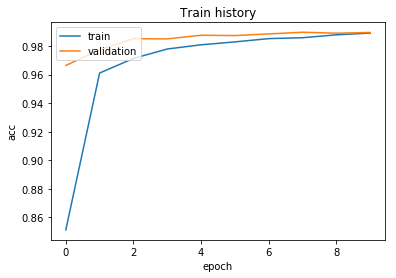

In [21]:
show_train_history(train_history, 'acc', 'val_acc')

In [22]:
scores = model.evaluate(X_test_normalized, y_test_one_hot)
print(scores)

10000/10000 [==============================] - 4s     

In [27]:
%save cnn_handwriting_number_recognition.py 

File `cnn_handwriting_number_recognition.py` exists. Overwrite (y/[N])?  y
'' was not found in history, as a file, url, nor in the user namespace.
